In [1]:
import stmpy.driftcorr as dfc
import stmpy.hp.kondo_holes as kh
from stmpy.color.palette import solarized, hpalette
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes, mark_inset
%pylab inline
import stmpy
from stmpy import matio
import numpy as np
import scipy.io as sio
import os
import re
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from struct import unpack

Populating the interactive namespace from numpy and matplotlib


In [10]:
u2 = stmpy.load('C:/Users/Jacob Liao/Documents/GitHub/RHK-SM4/test_files/2020-04-13_010_V_map1_0080.sm4')
#The load_sm4 can now output several attributes: including I, iv, LIY, didv, didvStd, Z, en

ERR: LIY channel not found
ERR: Z channel not found


In [3]:
u2.info

,Label,PageDataType,PageSourceType,PageType,LineType,ImageType,XSize,YSize,Bias,Current
0,Z h: ZPI1 Output,DATA_LINE,SOURCE_RAW,PAGE_RAMP_SPECTROSCOPY_RP,LINE_IV_SPECTRUM,IMAGE_NORMAL,801,2,0.4,-1.26
1,dF,DATA_LINE,SOURCE_RAW,PAGE_RAMP_SPECTROSCOPY_RP,LINE_IV_SPECTRUM,IMAGE_NORMAL,801,2,0.4,-1.26
2,PLL: Lockin 2 Phase,DATA_LINE,SOURCE_RAW,PAGE_RAMP_SPECTROSCOPY_RP,LINE_IV_SPECTRUM,IMAGE_NORMAL,801,2,0.4,-1.26
3,PLL Amplitude,DATA_LINE,SOURCE_RAW,PAGE_RAMP_SPECTROSCOPY_RP,LINE_IV_SPECTRUM,IMAGE_NORMAL,801,2,0.4,-1.26
4,PLL Drive,DATA_LINE,SOURCE_RAW,PAGE_RAMP_SPECTROSCOPY_RP,LINE_IV_SPECTRUM,IMAGE_NORMAL,801,2,0.4,-1.26
5,qPlus,DATA_LINE,SOURCE_RAW,PAGE_RAMP_SPECTROSCOPY_RP,LINE_IV_SPECTRUM,IMAGE_NORMAL,801,2,0.4,-1.26
6,Current,DATA_LINE,SOURCE_RAW,PAGE_RAMP_SPECTROSCOPY_RP,LINE_IV_SPECTRUM,IMAGE_NORMAL,801,2,0.4,-1.26


In [4]:
u2.header[5]

{'PageID': 5000,
 'PageDataType': 1,
 'PageDataTypeName': 'DATA_LINE',
 'PageSourceType': 0,
 'PageSourceTypeName': 'SOURCE_RAW',
 'MinorVer': 6,
 'Signature': 'STiMage 005.004 1',
 'PageType': 38,
 'PageTypeName': 'PAGE_RAMP_SPECTROSCOPY_RP',
 'DataSubSource': 0,
 'LineType': 7,
 'LineTypeName': 'LINE_IV_SPECTRUM',
 'Xcorner': 0,
 'Ycorner': 0,
 'Xsize': 801,
 'Ysize': 2,
 'ImageType': 0,
 'ImageTypeName': 'IMAGE_NORMAL',
 'ScanType': 1,
 'ScanTypeName': 'SCAN_LEFT',
 'GroupId': 0,
 'MinZvalue': 0,
 'MaxZvalue': 0,
 'Xscale': -0.025,
 'Yscale': 1.0,
 'Zscale': 4.656613e-09,
 'XYscale': 0.0,
 'Xoffset': 10.0,
 'Yoffset': 0.0,
 'Zoffset': 0.0,
 'Period': 1e-04,
 'Bias': 0.4,
 'Current': -1.26,
 'Angle': 0.0,
 'GridXsize': 0,
 'GridYsize': 0,
 'Label': 'qPlus',
 'SystemText': '',
 'SessionText': 'amplitude 175 mV, Z sweep map1, 1. bias 0.4 V',
 'UserText': '',
 'Date': '04/13/20',
 'Time': '15:44:17',
 'Xunits': 'V',
 'Yunits': ' ',
 'Zunits': 'V',
 'Xlabel': 'Voltage',
 'Ylabel': 'qPlus

In [5]:
u2.iv

array([-9.48924573e-15, -1.50075654e-14, -1.80318017e-14,  1.14957804e-14,
       -1.47463286e-14, -1.20541072e-14, -4.99398471e-15,  1.63766078e-14,
       -1.50757838e-14, -1.35474839e-14, -2.10811847e-14, -7.91344766e-15,
        1.39884645e-14, -3.83425523e-14,  2.12991144e-14, -9.18656529e-15,
       -1.01607294e-14, -3.62591833e-14, -2.71492152e-14, -6.47571850e-15,
        7.24499044e-15, -5.35254350e-14, -4.32585350e-14, -2.92402685e-14,
        4.38163960e-15,  1.10613186e-14, -4.12748178e-14, -3.43134131e-14,
       -1.50299152e-14,  1.70064158e-14, -1.00536268e-15, -2.19973745e-14,
       -2.11640719e-14, -3.34628836e-14,  5.73461899e-16, -2.38455817e-14,
        3.97581595e-15, -2.62192916e-14, -8.24476460e-15, -7.74301532e-15,
       -2.17950420e-14, -2.21128573e-14, -3.08919692e-15, -1.23281503e-14,
       -7.42636560e-15, -3.84321887e-14,  2.09922428e-14, -2.13002765e-14,
       -1.19835596e-14, -2.83396794e-14,  5.16115682e-15, -1.77170155e-14,
       -1.47812535e-14, -

In [6]:
u2.I

array([[ 3.3359041e-14, -3.1172764e-14, -3.1659378e-14, ...,
        -2.2629275e-14, -3.1004194e-14, -5.1714943e-14],
       [-5.2337532e-14,  1.1576339e-15, -4.4042245e-15, ...,
        -5.3105408e-14, -5.9037004e-14,  6.4494088e-15]], dtype=float32)

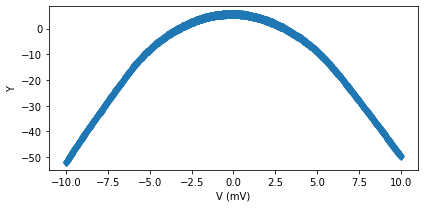

In [7]:
figure(figsize=[6, 3]); ax = subplot(111)

plot(u2.en, u2.data[1][0], 'd')

ax.set_xlabel('V (mV)')
ax.set_ylabel('Y')

tight_layout()

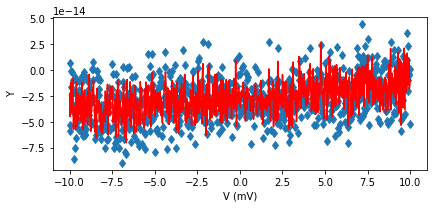

In [8]:
figure(figsize=[6, 3]); ax = subplot(111)

plot(u2.en, u2.I[1], 'd')
plot(u2.en, u2.iv, 'r')

ax.set_xlabel('V (mV)')
ax.set_ylabel('Y')

tight_layout()

In [9]:
u2.header[0]

{'PageID': 5946,
 'PageDataType': 1,
 'PageDataTypeName': 'DATA_LINE',
 'PageSourceType': 0,
 'PageSourceTypeName': 'SOURCE_RAW',
 'MinorVer': 6,
 'Signature': 'STiMage 005.004 1',
 'PageType': 38,
 'PageTypeName': 'PAGE_RAMP_SPECTROSCOPY_RP',
 'DataSubSource': 0,
 'LineType': 7,
 'LineTypeName': 'LINE_IV_SPECTRUM',
 'Xcorner': 0,
 'Ycorner': 0,
 'Xsize': 801,
 'Ysize': 2,
 'ImageType': 0,
 'ImageTypeName': 'IMAGE_NORMAL',
 'ScanType': 1,
 'ScanTypeName': 'SCAN_LEFT',
 'GroupId': 0,
 'MinZvalue': 0,
 'MaxZvalue': 0,
 'Xscale': -0.025,
 'Yscale': 1.0,
 'Zscale': -2.7939678e-16,
 'XYscale': 0.0,
 'Xoffset': 10.0,
 'Yoffset': 0.0,
 'Zoffset': 0.0,
 'Period': 1e-04,
 'Bias': 0.4,
 'Current': -1.26,
 'Angle': 0.0,
 'GridXsize': 0,
 'GridYsize': 0,
 'Label': 'Z h: ZPI1 Output',
 'SystemText': '',
 'SessionText': 'amplitude 175 mV, Z sweep map1, 1. bias 0.4 V',
 'UserText': '',
 'Date': '04/13/20',
 'Time': '15:44:17',
 'Xunits': 'V',
 'Yunits': ' ',
 'Zunits': 'm',
 'Xlabel': 'Voltage',
 'Yl